In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
from statsmodels.tsa.stattools import coint
import pandas as pd
import scipy.stats as st


In [2]:

msft = yf.Ticker("UVXY")

# get stock info
# print(msft.info)

# get historical market data
hist = msft.history(period="300d")

In [3]:
hist.shape

(299, 7)

In [4]:
hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-08,12.55,12.69,11.86,12.37,20932700,0,0
2020-01-09,11.87,12.08,11.66,11.68,13253200,0,0
2020-01-10,11.63,11.79,11.39,11.59,15723900,0,0
2020-01-13,11.40,11.56,11.11,11.13,10598500,0,0
2020-01-14,11.16,11.31,10.86,11.03,18930400,0,0
2020-01-15,11.01,11.07,10.84,10.97,13842300,0,0
2020-01-16,10.73,10.76,10.52,10.58,12446400,0,0
2020-01-17,10.56,10.91,10.54,10.62,12949300,0,0
2020-01-21,10.82,10.84,10.40,10.74,16445900,0,0


In [5]:
hist['gains'] = (hist.Close - hist.Close.shift(1))/hist.Close.shift(1) * 100

In [6]:
hist.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains
Date,,,,,,,,
2021-03-03,8.51,9.17,8.40,9.1600,129788100,0,0,6.387923
2021-03-04,8.99,10.35,8.69,9.7500,203719600,0,0,6.441050
2021-03-05,9.18,10.16,8.66,8.7200,165968700,0,0,-10.564100
2021-03-08,8.73,9.04,8.45,8.9200,74525300,0,0,2.293576
2021-03-09,8.56,8.63,8.25,8.4000,79805600,0,0,-5.829601
2021-03-10,8.06,8.33,8.06,8.2500,64532000,0,0,-1.785710
2021-03-11,8.05,8.07,7.85,7.9000,57751800,0,0,-4.242423
2021-03-12,8.15,8.19,7.71,7.7400,62128900,0,0,-2.025321
2021-03-15,7.67,7.76,7.01,7.0600,73132400,0,0,-8.785528


<AxesSubplot:xlabel='Date'>

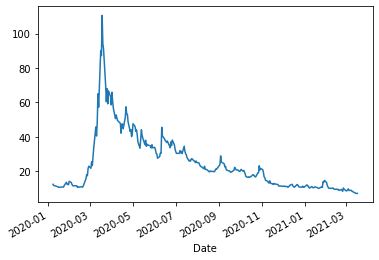

In [7]:
hist.Close.plot()

In [8]:
hist['gains'].describe()

count    298.000000
mean       0.200875
std        9.310423
min      -23.246625
25%       -4.924877
50%       -1.611992
75%        2.520748
max       57.477283
Name: gains, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gains', ylabel='Density'>

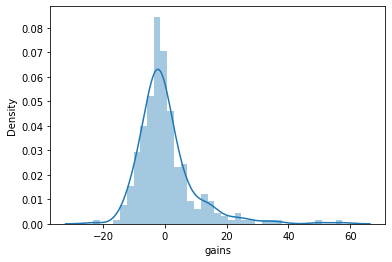

In [9]:
sns.distplot(hist.gains)

In [10]:
st.norm.cdf(-5, hist['gains'].mean(), hist['gains'].std())

0.288214694086535

In [11]:
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="300d")


In [12]:
spy_hist['gains'] = (spy_hist.Close - spy_hist.Close.shift(1))/spy_hist.Close.shift(1) * 100
spy_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains
Date,,,,,,,,
2020-01-08,317.019747,319.807680,316.754708,318.502075,68296000,0.0,0,NaN
2020-01-09,320.180675,320.740232,319.552393,320.661682,48473300,0.0,0,0.678051
2020-01-10,321.289974,321.456840,319.238292,319.738922,53029300,0.0,0,-0.287767
2020-01-13,320.406467,321.947663,319.945082,321.937866,47086800,0.0,0,0.687731
2020-01-14,321.466675,322.595586,320.848219,321.447052,62832800,0.0,0,-0.152456
...,...,...,...,...,...,...,...,...
2021-03-10,389.690002,391.399994,388.170013,389.579987,109660800,0.0,0,0.622459
2021-03-11,392.230011,395.649994,391.739990,393.529999,86027400,0.0,0,1.013916
2021-03-12,392.070007,394.209991,391.200012,394.059998,64608100,0.0,0,0.134678


In [13]:
spy_hist['gains'].describe()

count    298.000000
mean       0.091268
std        1.981088
min      -10.942365
25%       -0.566472
50%        0.212628
75%        0.939782
max        9.060328
Name: gains, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gains', ylabel='Density'>

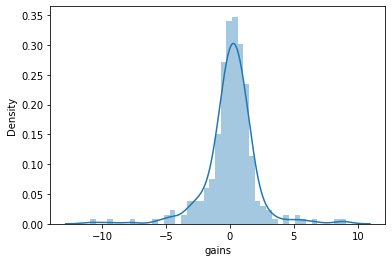

In [14]:
sns.distplot(spy_hist.gains)

In [15]:
st.norm.cdf(-1, spy_hist['gains'].mean(), spy_hist['gains'].std())

0.2908706578586717

<AxesSubplot:xlabel='Date'>

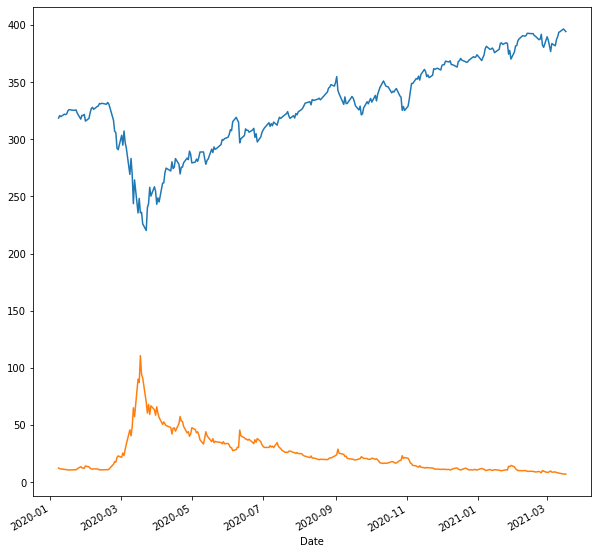

In [16]:
spy_hist.Close.plot(figsize=(10,10))
hist.Close.plot()

In [17]:
np.corrcoef(spy_hist.Close, hist.Close)

array([[ 1.        , -0.87950285],
       [-0.87950285,  1.        ]])

In [18]:
spy_hist.gains.fillna(0, inplace=True)
hist.gains.fillna(0, inplace=True)

In [19]:
np.corrcoef(spy_hist.gains, hist.gains)

array([[ 1.        , -0.76891746],
       [-0.76891746,  1.        ]])

<AxesSubplot:xlabel='Date'>

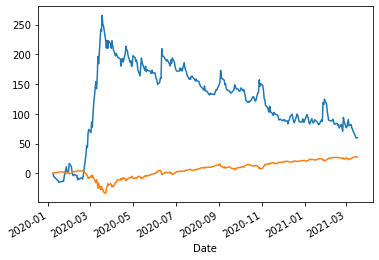

In [20]:
hist.gains.cumsum().plot()
spy_hist.gains.cumsum().plot()

In [21]:
score, pvalue, _ = coint(hist.gains, spy_hist.gains)
print(score, pvalue)

score, pvalue, _ = coint(hist.Close, spy_hist.Close)
print(score, pvalue)

-4.817014590317245 0.00035216167793320174
-3.0897730540618102 0.09037539396687716


In [22]:
np.corrcoef(hist.Close, spy_hist.Close)

array([[ 1.        , -0.87950285],
       [-0.87950285,  1.        ]])

In [23]:
spy_hist['spy_gains'] = spy_hist['gains']

In [24]:
hist.reset_index(inplace=True)
spy_hist.reset_index(inplace=True)

In [25]:
data = pd.merge(hist[['Date','gains','Close']], spy_hist[['Date','spy_gains']], on='Date')
data.set_index(keys='Date')

,gains,Close,spy_gains
Date,,,
2020-01-08,0.000000,12.3700,0.000000
2020-01-09,-5.578008,11.6800,0.678051
2020-01-10,-0.770549,11.5900,-0.287767
2020-01-13,-3.968939,11.1300,0.687731
2020-01-14,-0.898476,11.0300,-0.152456
...,...,...,...
2021-03-10,-1.785710,8.2500,0.622459
2021-03-11,-4.242423,7.9000,1.013916
2021-03-12,-2.025321,7.7400,0.134678


In [68]:
# data['rate'] = (data.gains+0.1) / (data.spy_gains+0.1)
data['rate'] = data.gains - data.spy_gains

In [69]:
data[data['rate']>0]

,Date,gains,Close,spy_gains,rate
7,2020-01-17,0.378071,10.6200,0.311269,0.066802
8,2020-01-21,1.129942,10.7400,-0.195824,1.325767
9,2020-01-22,0.837990,10.8300,0.012067,0.825923
11,2020-01-24,8.921933,11.7200,-0.889309,9.811242
12,2020-01-27,15.614333,13.5500,-1.602939,17.217272
...,...,...,...,...,...
288,2021-03-02,1.056329,8.6100,-0.780322,1.836650
289,2021-03-03,6.387923,9.1600,-1.324571,7.712494
290,2021-03-04,6.441050,9.7500,-1.237481,7.678531
292,2021-03-08,2.293576,8.9200,-0.497877,2.791452


In [70]:
data.rate.describe()

count    299.000000
mean       0.109240
std       10.889203
min      -22.688240
25%       -5.432485
50%       -1.900239
75%        2.787444
max       68.419648
Name: rate, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

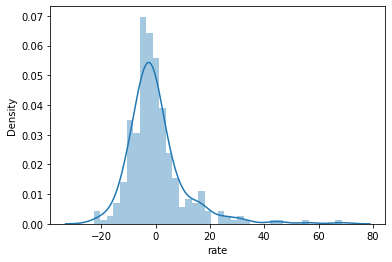

In [71]:
sns.distplot(data.rate)

In [72]:
data.fillna(0,inplace=True)
data.isna().sum()

Date         0
gains        0
Close        0
spy_gains    0
rate         0
dtype: int64

In [73]:
print((data.rate>50).sum())
# data = data[abs(data['rate'])<50]
(data.rate>50).sum()

2


2

data.rate.plot()
plt.axhline(data.rate.mean(), color='red', linestyle='--') 

0.10924037236190204 10.889202751387174


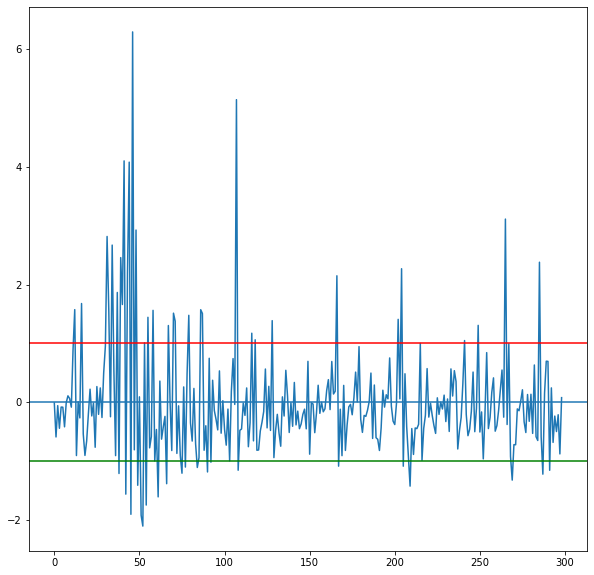

In [74]:
def zscore(series):
    print(series.mean(), series.std())
    return (series - series.mean()) / np.std(series)

z_score = zscore(data.rate)
z_score.plot(figsize=(10,10))
plt.axhline(z_score.mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

# 开始预测

In [75]:
# rolling ?

In [76]:
print(z_score.shape)
train = z_score[:200]
test = z_score[200:]
print(train.shape, test.shape)

(299,)
(200,) (99,)


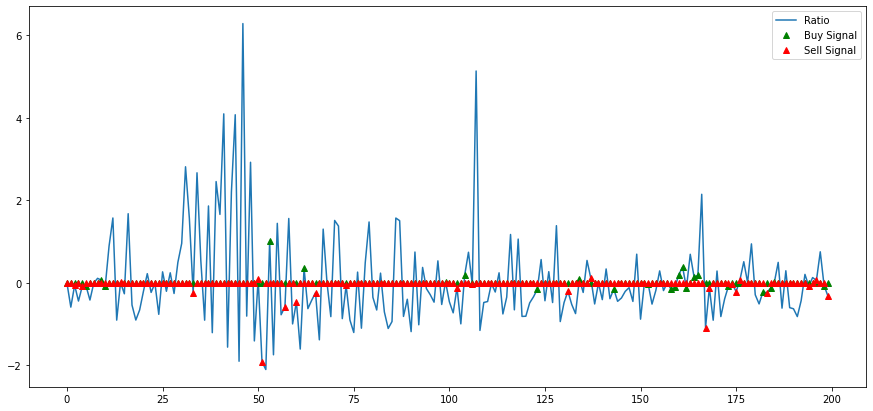

In [77]:
plt.figure(figsize=(15,7))
train.plot()
buy = train.copy()
sell = train.copy()

# buy[z_score>-1] = 0
# sell[z_score<1] = 0
buy[~((data['gains']>-1) & (data['spy_gains']>0))] = 0
sell[~((data['gains']<1) & (data['spy_gains']<0))] = 0



buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,data.rate.min(),data.rate.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

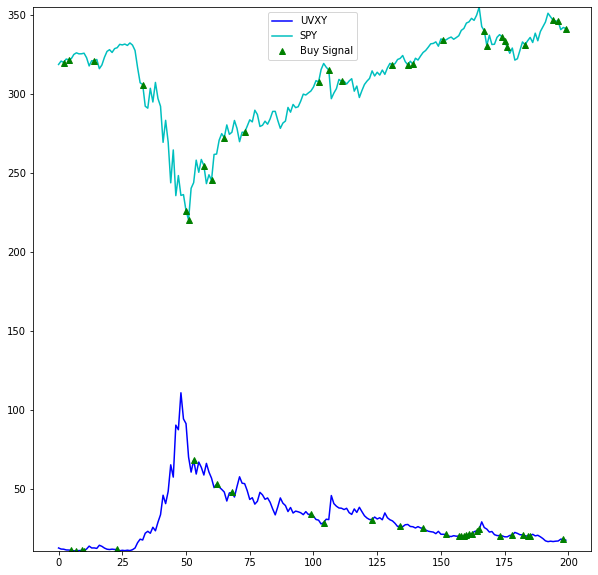

In [78]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(10,10))
S1 = hist.iloc[:200].Close
S2 = spy_hist.iloc[:200].Close

S1.plot(color='b')
S2.plot(color='c')

buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR.plot(color='g', linestyle='None', marker='^')
# sellR.plot(color='r', linestyle='None', marker='^')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['UVXY','SPY', 'Buy Signal', 'Sell Signal'])
plt.show()

In [79]:
# Trade using a simple strategy
def trade(data, window1, window2):
    
    S1 = data['gains']
    S2 = data['spy_gains']
    
    close = data['Close']
    date = data['Date']
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(S1)):
        # buy
        if S1[i]>0 and S2[i]>0:
          
            if countS1<0:
                money -= close[i]*abs(countS1)
                countS1 = 0
            
            money -= close[i]
            countS1 += 1
                
            print('Buying volatility %s at %f %f %s %s'%(date[i], close[i], money+countS1*close[i], countS1,countS2))
        elif S1[i]<0 and S2[i]<0:
            if countS1>0:
                money += close[i] * countS1
                countS1 = 0
            
            money += close[i]
            countS1 -= 1
                
            print('Selling volatility %s at %f %f %s %s'%(date[i], close[i], money+countS1*close[i], countS1,countS2))
            
   
            
    return money+countS1*close.iloc[-1]
trade(data.iloc[:200], 5, 60)

Selling volatility 2020-01-10 00:00:00 at 11.590000 0.000000 -1 0
Selling volatility 2020-01-14 00:00:00 at 11.030000 0.560000 -2 0
Buying volatility 2020-01-17 00:00:00 at 10.620000 1.380000 1 0
Buying volatility 2020-01-22 00:00:00 at 10.830000 1.590000 2 0
Buying volatility 2020-02-11 00:00:00 at 11.450000 2.830000 3 0
Selling volatility 2020-02-26 00:00:00 at 17.420000 20.740001 -1 0
Selling volatility 2020-03-20 00:00:00 at 91.110001 -52.950000 -2 0
Selling volatility 2020-03-23 00:00:00 at 69.930000 -10.589999 -3 0
Buying volatility 2020-03-25 00:00:00 at 68.000000 -4.799998 1 0
Selling volatility 2020-03-31 00:00:00 at 58.560001 -14.239997 -1 0
Selling volatility 2020-04-03 00:00:00 at 56.590000 -12.269996 -2 0
Buying volatility 2020-04-07 00:00:00 at 52.700001 -4.489997 1 0
Selling volatility 2020-04-13 00:00:00 at 47.799999 -9.389998 -1 0
Buying volatility 2020-04-16 00:00:00 at 47.529999 -9.119998 1 0
Selling volatility 2020-04-23 00:00:00 at 53.099998 -3.549998 -1 0
Buying v

58.62000751495361

In [80]:
hist[hist['Date'] == "2020-03-25"]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains
53,2020-03-25,63.0,72.019997,62.299999,68.0,11370100,0,0,12.582779


In [81]:
spy_hist[spy_hist['Date'] == "2020-03-25"]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains,spy_gains
53,2020-03-25,241.79444,253.130262,236.738752,243.690323,299430300,0.0,0,1.497019,1.497019
